<a href="https://colab.research.google.com/github/TamiresWT/Ci-ncias-de-Dados/blob/main/semana3_exerc_cio_tamires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
# importando biblioteca Pandas
import pandas as pd

In [ ]:
#Criando biblioteca do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#criando DataFrame df com os dados do ideb
df = pd.read_csv('/content/drive/MyDrive/arquivos/ideb.csv')
df.head()

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
1,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
2,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
3,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN
4,2005,AC,1200336,municipal,fundamental,iniciais (1-5),74.7,0.752579,138.0,134.19,3.038804,2.3,NaN


In [ ]:
#Filtrando pela ano e selecionando as colunas ano, sigla_uf, taxa_aprovacao, nota_saeb_matematica, nota_saeb_lingua_portuguesae e ideb
#para comporem o novo DataFrame
df_filtro = df[['ano', 'sigla_uf','taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]
df_filtro.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [ ]:
#filtrando o df pelo ano 2019 e agrupando por estados considerando a média
df_2019 = df_filtro[df_filtro['ano'] ==2019].groupby(by='sigla_uf').mean()
df_2019 = df_2019.reset_index()
df_2019.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125


In [ ]:
#Obtendo um resumo conciso do DataFrame
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sigla_uf                     27 non-null     object 
 1   ano                          27 non-null     float64
 2   taxa_aprovacao               27 non-null     float64
 3   nota_saeb_matematica         27 non-null     float64
 4   nota_saeb_lingua_portuguesa  27 non-null     float64
 5   ideb                         27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


### Atividade 3: Padronize os dados.

In [ ]:
# importando a função de padronização
from sklearn.preprocessing import StandardScaler

# instanciando a função chamada de scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame (fazendo um novo df e preservando os dados do df2 caso venha utilizá-los novamente)
df_scaled  = df_2019.copy()

# removendo dados categóricos, a coluna de estado não é numérica é string (textual)
#removendo a coluna ano
#eixo 0 é linha; eixo 1 é coluna; inplace=True para efetivar a mudanças dentro do df_scaled
df_scaled.drop(['sigla_uf', 'ano'], inplace=True, axis=1)

# Criando no df as 5 colunas que já existiam antes e adicionando o arreda numpy (scaler.fit_transform(df_scaled)), ou seja,
#pegando o arreda numpy e convertando-o a DataFrame, mantendo o nome das colunas originais, que já tinhamos
# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna sigla_uf para saber a qual estado cada dado representa. Recolocando ela no banco de dados original
df_scaled['sigla_uf'] = df_2019['sigla_uf']

#obtemos assim o mesmo conjunto de dados na escala correta
df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,sigla_uf
0,-0.025280,0.080727,-0.016434,0.092154,AC
1,0.801179,-0.437122,-0.531887,-0.201424,AL
2,-0.426168,-1.474271,-1.443233,-1.063297,AM
3,-1.670713,-1.889188,-1.751891,-1.674063,AP
4,-1.323101,-0.713999,-0.626401,-1.060175,BA


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

In [ ]:
# importando seaborn
import seaborn as sns

In [ ]:
#Calculando correlação de Pearson entre todas as variáveis
df_scaled.corr()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
taxa_aprovacao,1.000000,0.694758,0.678749,0.810383
nota_saeb_matematica,0.694758,1.000000,0.991215,0.956512
nota_saeb_lingua_portuguesa,0.678749,0.991215,1.000000,0.938921
ideb,0.810383,0.956512,0.938921,1.000000


In [ ]:
#correlação de Pearson entre as variáveis escolhidas: taxa de aprovação e ideb
df_scaled[['taxa_aprovacao','ideb']].corr()

,taxa_aprovacao,ideb
taxa_aprovacao,1.000000,0.810383
ideb,0.810383,1.000000


In [ ]:
# importando o KMeans - função de clustorização kMeans
from sklearn.cluster import KMeans

In [ ]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

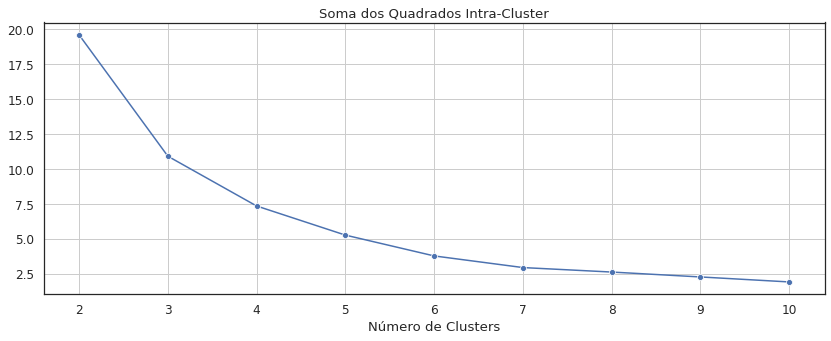

In [ ]:
#criando gráfico de cotovelo configurando o tamanho da figura de acordo com o desenho
sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})

inercia = []
k_min = 2
k_max = 10

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    inercia.append(kmeans.inertia_)

#plotar o lineplot que precisa de x e y, x será o range que vai do kmin para o kmax+1 e o y será os valores da lista inércia; marker= '0' será
#marcada uma bolinha em cima da linha para cada valor inteiro
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
#colocar título no gráfico
plt.title('Soma dos Quadrados Intra-Cluster')
#label do eixo x - número de clusters
plt.xlabel('Número de Clusters')
#coloca as gradinhas no fundo do gráfico
plt.grid(True)

In [ ]:
# calculando a quantidade ótima de clusters
def numero_otimo_clusters(k_min, k_max):
    from sklearn.cluster import KMeans
    import math
    inercia = []

    for i in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
        inercia.append(kmeans.inertia_)

    x0, y0 = k_min, inercia[0]
    x1, y1 = k_max, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+k_min
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

k_otimo = numero_otimo_clusters(2,10)

print('Número otimizado de clusters: ' + str(k_otimo))

Número otimizado de clusters: 4


### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

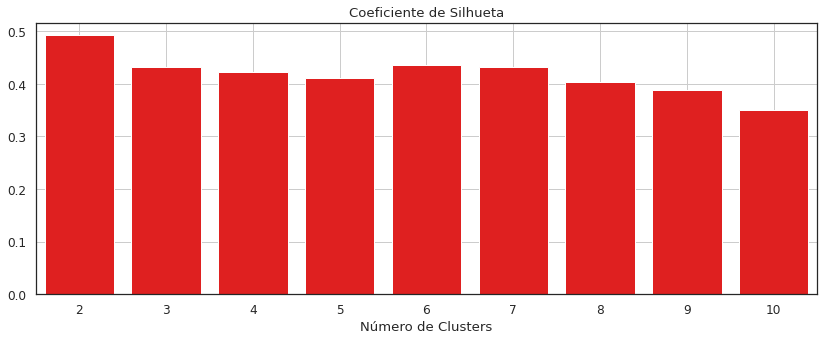

In [ ]:
#Utilizando o método silhueta
from sklearn.metrics import silhouette_score

silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):

    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    silhueta.append(silhouette_score(df_scaled[['taxa_aprovacao','ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))
#Criar um gráfico de barras - barplot com range que vai de 2 até o 10 -> por isso acima criado o n 'n = [i for i in range(k_min, k_max+1)]'
#em que o x será o valor de n e o y o valor da silhueta e definição da cor das barras de vermelho
sns.barplot(x=n, y=silhueta, color='red')
#colocar título no gráfico
plt.title('Coeficiente de Silhueta')
#label do eixo x - número de clusters
plt.xlabel('Número de Clusters')
#coloca as gradinhas no fundo do gráfico
plt.grid(True)

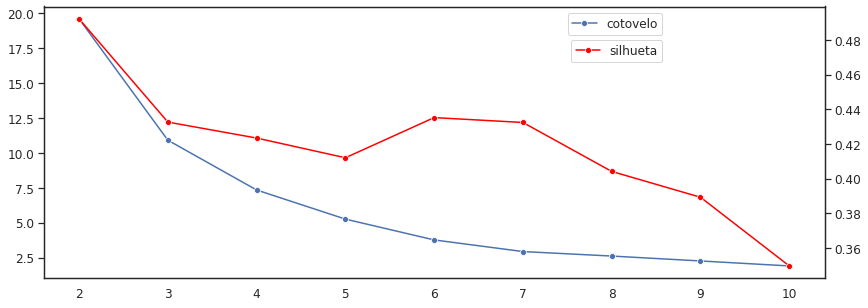

In [ ]:
#plotando o gráfico da silhueta e do cotovelo sobrepostos.
#dizemos que o primeiro eixo (ax) será o primeiro gráfico com 'fig, ax = plt.subplots()'
#e o segundo eixo (ax2) será ax2 = ax.twinx()
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [ ]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=4, random_state=42)

# aplicando o algoritmo aos dados '.fit' aplicando ao conjunto de dados na escala correta. Passar somente as colunas de interesse.
kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])

#A mensagem retornada quer dizer que o objeto KMeans foi criado com os parâmetro solicitados e aplicado ao conjunto de dados.

KMeans(n_clusters=4, random_state=42)

### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

In [ ]:
# vendo os grupos (lista de 0, 1, 2 e 3 - com 4 grupos)
kmeans.labels_

array([0, 0, 2, 1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 0, 1, 0, 2,
       0, 0, 1, 3, 0], dtype=int32)

In [ ]:
# adicionando os grupos encontrados ao DataFrame original
#add a coluna grupos que é um array (kmeans.labels_), que precisa ser convertido em lista
# converte em lista com o uso do '.tolist()'
df_2019 ['grupos'] = kmeans.labels_.tolist()
df_2019.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739,0
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295,0
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397,2
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444,1
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125,1


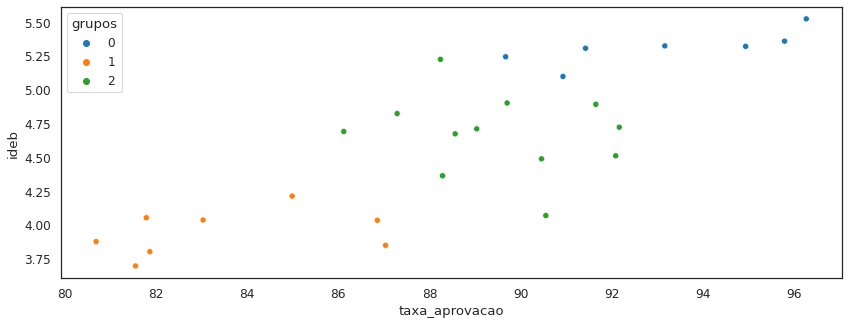

In [ ]:
# criando um gráfico de dispersão levando em considração os grupos
sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');

### Atividade 8: Quais são os estados de cada grupo?

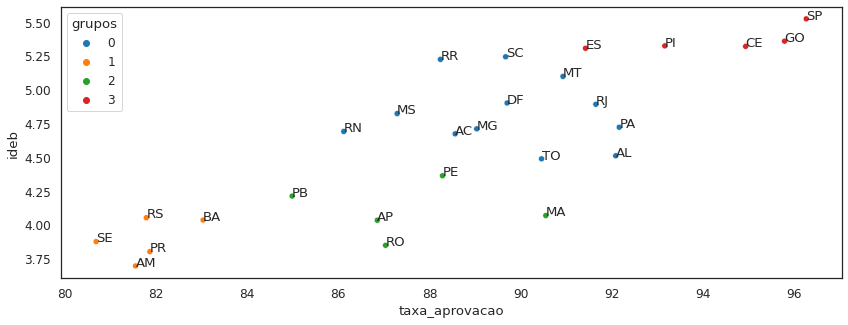

In [ ]:
# criando o gráfico de dispersão
#primeiro copia linha de código utilizada no gráfico anterior
sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');

#segundo
# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
#eixo x
aprovacao = df_2019['taxa_aprovacao']
#eixo y
ideb = df_2019['ideb']
#que será escrito. - pegar a coluna estado e olhar na ordem que eles aparecem e escrever as siglas
#organizar uma lista
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# anotando os 'nomes' de cada estado
#Uma sigla para cada ponto precisa escrever um laço de repetição para escrever tantas vezes quanto estados tiver.
#laço de repetição for i - enumerate cria uma enumeração, ex. acre 0, proximo 2...
#função annotate irá anotar o que queremos passar (estados)
#par ordenado i (que percorre os estados) eixo x desemprego e eixo y pobres
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprovacao[i], ideb[i]) );

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

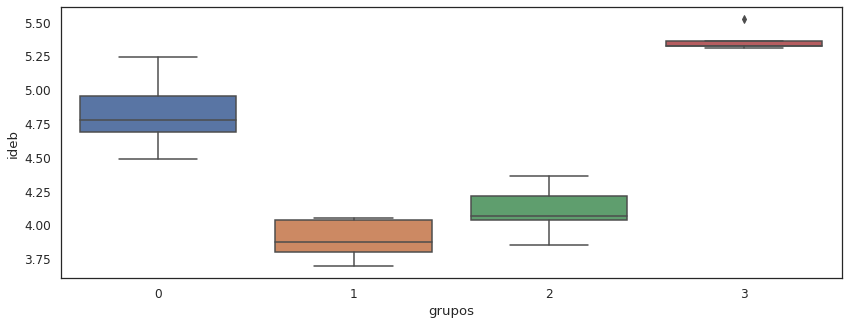

In [ ]:
#boxplot com a média do IDEB para cada cluster
sns.boxplot(x=df_2019['grupos'], y=df_2019['ideb']);

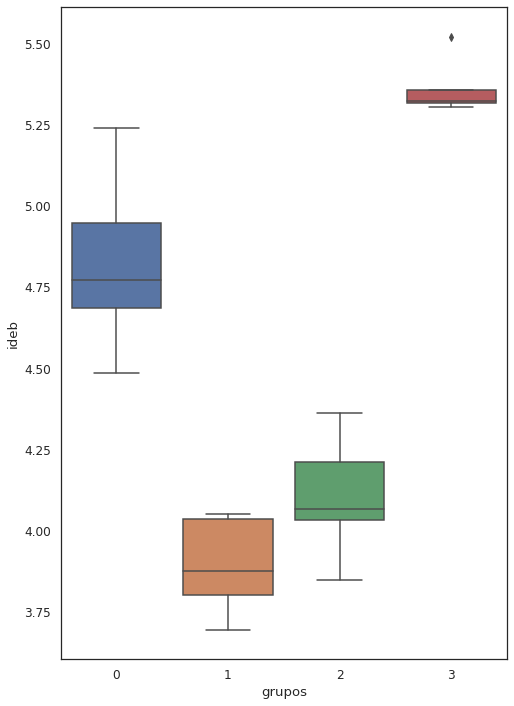

In [ ]:
#Alterando a dimensão do boxplot para deixá-lo mais visível para análise
plt.figure(figsize=(8,12))
sns.boxplot(x=df_2019['grupos'], y=df_2019['ideb']);

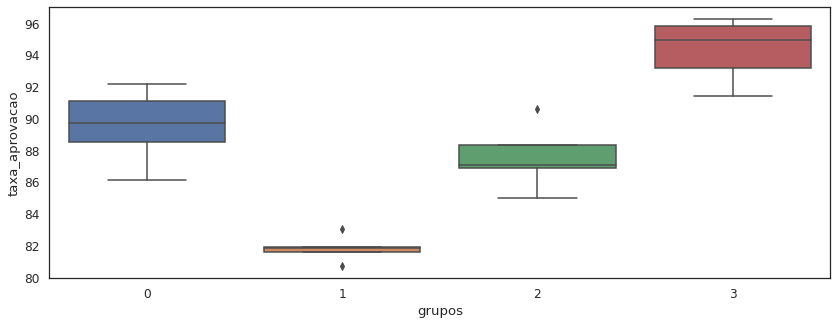

In [ ]:
#boxplot com a média da taxa de aprovação para cada cluster
sns.boxplot(x=df_2019['grupos'], y=df_2019['taxa_aprovacao']);

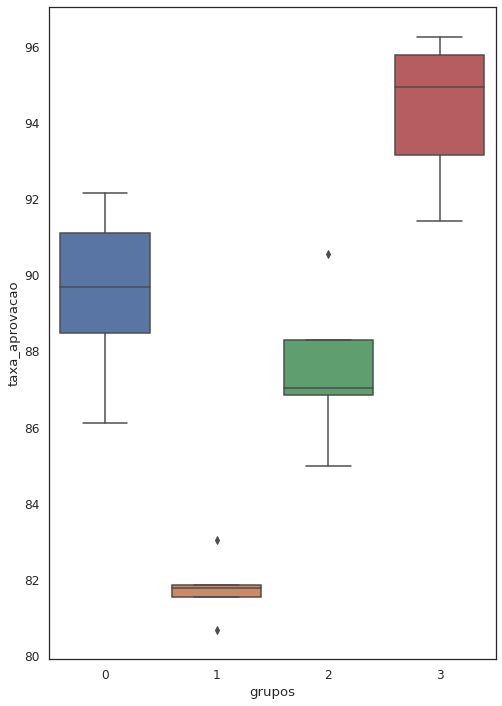

In [ ]:
#Alterando a dimensão do boxplot para deixá-lo mais visível para análise
plt.figure(figsize=(8,12))
sns.boxplot(x=df_2019['grupos'], y=df_2019['taxa_aprovacao']);

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
#Criando DataFrame para o cluster 0
df_2019_g0 = df_2019.loc[(df_2019['grupos'] == 0), ['ideb', 'taxa_aprovacao', 'sigla_uf', 'grupos']]
df_2019_g0.head()

,ideb,taxa_aprovacao,sigla_uf,grupos
0,4.671739,88.561184,AC,0
1,4.509295,92.081591,AL,0
6,4.900000,89.700000,DF,0
10,5.096277,90.924843,MG,0
11,4.821600,87.288296,MS,0


In [ ]:
#Obtendo um resumo conciso do DataFrame para o cluster 0
df_2019_g0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 26
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ideb            12 non-null     float64
 1   taxa_aprovacao  12 non-null     float64
 2   sigla_uf        12 non-null     object 
 3   grupos          12 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 480.0+ bytes


In [ ]:
#Criando DataFrame para o cluster 1
df_2019_g1 = df_2019.loc[(df_2019['grupos'] == 1), ['ideb', 'taxa_aprovacao', 'sigla_uf', 'grupos']]
df_2019_g1.head()

,ideb,taxa_aprovacao,sigla_uf,grupos
3,3.694444,81.552252,AP,1
4,4.034125,83.032948,BA,1
13,3.800239,81.866093,PA,1
19,4.051177,81.787971,RN,1
24,3.874759,80.687148,SE,1


In [ ]:
#Obtendo um resumo conciso do DataFrame para o cluster 1
df_2019_g1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 3 to 24
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ideb            5 non-null      float64
 1   taxa_aprovacao  5 non-null      float64
 2   sigla_uf        5 non-null      object 
 3   grupos          5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes


In [ ]:
#Criando DataFrame para o cluster 2
df_2019_g2 = df_2019.loc[(df_2019['grupos'] == 2), ['ideb', 'taxa_aprovacao', 'sigla_uf', 'grupos']]
df_2019_g2.head()

,ideb,taxa_aprovacao,sigla_uf,grupos
2,4.032397,86.853550,AM,2
9,4.067158,90.548944,MA,2
14,4.211407,84.985982,PB,2
16,4.361533,88.283689,PI,2
21,3.847222,87.035484,RR,2


In [ ]:
#Obtendo um resumo conciso do DataFrame para o cluster 2
df_2019_g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 21
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ideb            5 non-null      float64
 1   taxa_aprovacao  5 non-null      float64
 2   sigla_uf        5 non-null      object 
 3   grupos          5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes


In [ ]:
#Criando DataFrame para o cluster 3
df_2019_g3 = df_2019.loc[(df_2019['grupos'] == 3), ['ideb', 'taxa_aprovacao', 'sigla_uf', 'grupos']]
df_2019_g3.head()

,ideb,taxa_aprovacao,sigla_uf,grupos
5,5.318929,94.930585,CE,3
7,5.305036,91.419721,ES,3
8,5.357471,95.783982,GO,3
17,5.322486,93.157586,PR,3
25,5.522421,96.260068,SP,3


In [ ]:
#Obtendo um resumo conciso do DataFrame para o cluster 3
df_2019_g3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 5 to 25
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ideb            5 non-null      float64
 1   taxa_aprovacao  5 non-null      float64
 2   sigla_uf        5 non-null      object 
 3   grupos          5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes


In [ ]:
#Validando estatísticamente com ANOVA (análise de variância) para comparar a distribuição de três ou mais grupos em amostras independentes
from scipy.stats import f_oneway

In [ ]:
#Aplicando ANOVA na variável ideb
f_oneway(df_2019_g0['ideb'],
         df_2019_g1['ideb'],
         df_2019_g2['ideb'],
         df_2019_g3['ideb'])

F_onewayResult(statistic=57.57684464569191, pvalue=7.542508219427153e-11)

H0: Os grupos clustorizados são iguais para a variável IDEB H1: Os grupos clustorizados são diferentes para a variável IDEB Com o resultado do p-valor de pvalue=7.542508219427153e-11 e significância de 5%, obtemos como resultado que podemos reijar H0 e aceitar H1, ou seja,os grupos clustorizados são diferentes para a variável IDEB.

In [ ]:
#Aplicando ANOVA na variável taxa_aprovacao
f_oneway(df_2019_g0['taxa_aprovacao'],
         df_2019_g1['taxa_aprovacao'],
         df_2019_g2['taxa_aprovacao'],
         df_2019_g3['taxa_aprovacao'])

F_onewayResult(statistic=41.88559299972311, pvalue=1.7496929460410136e-09)

H0: Os grupos clustorizados são iguais para a variável taxa de aprovação H1: Os grupos clustorizados são diferentes para a variável taxa de aprovação Com o resultado do p-valor de pvalue=1.7496929460410136e-09 e significância de 5%, obtemos como resultado que podemos reijar H0 e aceitar H1, ou seja,os grupos clustorizados são diferentes para a variável taxa de aprovação.

In [ ]:
#Importando da biblioteca statsmodels, dentro do pacote multicomp, a função teste de Tukey (teste de comparações múltiplas)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#Juntando os DataFrames dos 4 clusters
df_2019_gs = pd.concat([df_2019_g0,df_2019_g1,df_2019_g2, df_2019_g3])

In [ ]:
#Aplicando o teste na variável taxa de aprovação
print(pairwise_tukeyhsd(endog = df_2019_gs['taxa_aprovacao'],
                  groups = df_2019_gs['grupos'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -7.8708  0.001 -10.545 -5.1967   True
     0      2  -2.1146 0.1565 -4.7887  0.5595  False
     0      3   4.6543  0.001  1.9801  7.3284   True
     1      2   5.7562  0.001  2.5789  8.9336   True
     1      3  12.5251  0.001  9.3478 15.7024   True
     2      3   6.7689  0.001  3.5915  9.9462   True
----------------------------------------------------


Para a variável taxa de aprovação, o teste de comparações múltiplas de Tukey nos retorna que os clusters tem valores de médias diferentes, por meio de reject=True, com excessão dos grupos 0 e 2 que não podemos afirmar que há diferença (reject=False).

In [ ]:
#Aplicando o teste na variável IDEB
print(pairwise_tukeyhsd(endog = df_2019_gs['ideb'],
                  groups = df_2019_gs['grupos'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.939  0.001 -1.2417 -0.6363   True
     0      2   -0.726  0.001 -1.0287 -0.4233   True
     0      3   0.5353  0.001  0.2326   0.838   True
     1      2    0.213 0.3786 -0.1467  0.5727  False
     1      3   1.4743  0.001  1.1146   1.834   True
     2      3   1.2613  0.001  0.9016   1.621   True
----------------------------------------------------


Para a variável IDEB, o teste de comparações múltiplas de Tukey nos retorna que os clusters tem valores de médias diferentes, por meio de reject=True, com excessão dos grupos 1 e 2 que não podemos afirmar que há diferença (reject=False).

### Atividade 11: Faça a clusterização com outro valor para k.

In [ ]:
# clusterização com k=3
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
# aplicando o algoritmo aos dados '.fit' aplicando ao conjunto de dados na escala correta. Passar somente as colunas de interesse.
kmeans.fit(df_scaled[['ideb','taxa_aprovacao']])

KMeans(n_clusters=3, random_state=42)

In [ ]:
# criando a coluna 'grupo'
df_2019['grupos'] = kmeans.labels_.tolist()

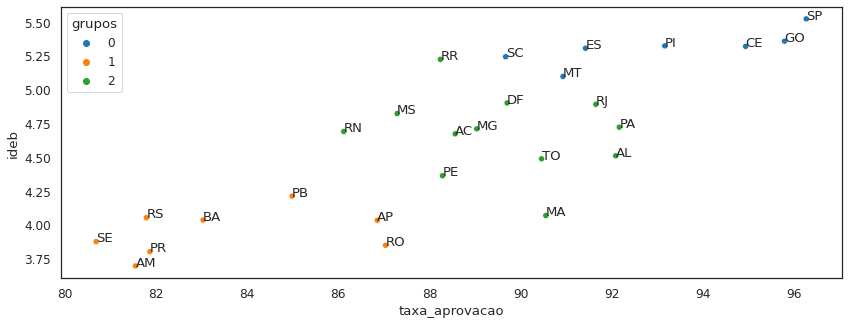

In [ ]:
# criando o gráfico de dispersão
sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb',
                hue='grupos', palette='tab10');

# criando listas que servirão de apoio para anotar a sigla de cada estado no gráfico
aprovacao = df_2019['taxa_aprovacao']
ideb = df_2019['ideb']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada estado
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprovacao[i], ideb[i]) );

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: k=3, pois de acordo com o teste de Tukey todos os clusters tem valores de médias diferentes, por meio de reject=True, para ambas as variáveis.

In [ ]:
##Criando DataFrame para os clusters 1, 2 e 3
df_2019_grupo0 = df_2019.loc[(df_2019['grupos'] == 0)]
df_2019_grupo1 = df_2019.loc[(df_2019['grupos'] == 1)]
df_2019_grupo2 = df_2019.loc[(df_2019['grupos'] == 2)]

In [ ]:
#Juntando os DataFrames dos 3 clusters
df_2019_grupos = pd.concat([df_2019_grupo0,df_2019_grupo1,df_2019_grupo2,])

In [ ]:
#Aplicando o teste de Tukey na variável taxa de aprovação
print(pairwise_tukeyhsd(endog = df_2019_grupos['taxa_aprovacao'],
                  groups = df_2019_grupos['grupos'],
                  alpha = 0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -9.6883  0.001 -12.6281 -6.7485   True
     0      2  -3.6541 0.0068  -6.3555 -0.9526   True
     1      2   6.0343  0.001   3.4416  8.6269   True
-----------------------------------------------------


In [ ]:
#Aplicando o teste de Tukey na variável IDEB
print(pairwise_tukeyhsd(endog = df_2019_grupos['ideb'],
                  groups = df_2019_grupos['grupos'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -1.366 0.001 -1.6605 -1.0715   True
     0      2  -0.6384 0.001  -0.909 -0.3678   True
     1      2   0.7276 0.001  0.4679  0.9873   True
---------------------------------------------------


### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

  Através da pesquisa verifiquei que seria interessante antes da clusterização e visualização de grupos, utilizar a redução da dimensionalidade (features ou colunas), que é o processo de reduzir o número de variáveis aleatórias e não essenciais de um dataset. Para fazer isso, é preciso identificar quais são as variáveis principais (Principal Components), nesse caso, o conjunto de variáveis que não são linearmente correlacionadas.
  Também ocorre que variáveis correlacionadas acabam sendo redundantes para um modelo de machine learning, como por exemplo, número de vezes por semana ou por mês que um lutador treina. Neste caso, não precisamos utilizar as duas variáveis para treinar o nosso modelo. A premissa é que as variáveis redundantes podem ser removidas sem a perda de informação/valor para o modelo.
  Esse procedimento é essencial para não ocorrer o conceito de maldição da dimensionalidade (The Curse of Dimensionality), que se refere a todos os problemas que surgem quando trabalhamos com dados de dimensões elevadas (quantidade de colunas e não de linhas). Quando o número de features aumenta, o número de amostras precisa aumentar também para que o número de combinações entre features e classes seja satisfatório. Isso faz com que o modelo fique cada vez mais complexo. Além disso, quanto maior o número de features, maior a chance de ocorrer overfitting.
  Dessa forma, a redução de dimensionalidade é capaz de simplificar modelos, reduzir o tempo de treino e reduzir o overfitting.
O overfitting ocorre quando um modelo treino entende perfeitamente os dados utilizados no treino. Funcionando bem até para os ruídos ou dados comprometidos do sistema, isso faz com que tenha um resultado excelente para os dados de treino, mas tenha um resultado ruim com dados novos.
Redução de Dimensionalidade é muito útil para aprendizado não supervisionado. Nesse tipo de aprendizado, inferências são extraídas das features sem saber quais os seus rótulos ou classes. É utilizado para explorar padrões ocultos ou agrupamentos de dados nos dados.
  Na biblioteca Scikit-Learn existem três técnicas para redução de dimensionalidade: principal component analysis (PCA), LinearDiscriminantAnalysis (LDA), e Isomap. PCA e LDA são métodos lineares. Isomap é um método não-linear.

  [fonte](https://ealexbarros.medium.com/o-que-%C3%A9-a-redu%C3%A7%C3%A3o-de-dimensionalidade-em-machine-learning-cc2a89e3cdec)